#**Simulación de estrategias de apuestas en carreras de caballos**
Dario Lucciano Rodriguez Dueñez   Verónica Ruiz Navarro

##Plantamiento del problema
En un hipódromo local se realizan carreras con 5 caballosde caballos, por medio de simulacion se quiere determinar la mejor estrategia para apostar dinero.

Se sabe que Cada caballo tiene diferentes probabilidades de ganar basadas en su historial:

* Caballo A (Favorito): 35% de probabilidad de ganar, paga 2:1 si gana
* Caballo B: 25% de probabilidad de ganar, paga 3:1 si gana
* Caballo C: 20% de probabilidad de ganar, paga 4:1 si gana
* Caballo D: 15% de probabilidad de ganar, paga 5:1 si gana
* Caballo E (Perdedor): 5% de probabilidad de ganar, paga 10:1 si gana
<br>

Para hacer el caso mas realista se planteo que el apostador segun su capital actual comparado con el inicial decidiera apostar menos entre menos dinero tuviera, siguiendo el siguiente patron:

* Si tiene más del 80% de su capital inicial, apuesta el 15% de su capital actual
* Si tiene entre 50% y 80% de su capital inicial, apuesta el 10% de su capital actual
* Si tiene menos del 50% de su capital inicial, apuesta el 8% de su capital actual (estrategia conservadora)

Tambien se agrego el caso en el que decide retirarse al tener menos de 500 de capital, viendo que la mayoria de los apostadores se retiraban en 500.
<br><br>

Las estrategias que el apostador puede seguir y que se pondran aprueba seran las siguientes:
* Estrategia A: Siempre apostar al favorito
* Estrategia B: Distribuir su apuesta entre los 3 primeros caballos
* Estrategia C: Apostar aleatoriamente a cualquier caballo
<br>

En la simulacion los apostadores empezaran con un capital inicial de 10,000$ y se obtendra como quedo su capital despues de aplicar una de las estrategias durante 50 carreras seguidas.

Se generaran 10,000 apostadores por cada estrategia y por medio de graficas y calculos se obtendra informacion necesaria para poder sacar una conclusion de cual de las 3 estrategias tuvo el mejor resultado.


##Objetivos
###General
- Analizar diferentes estrategias de apuestas en carreras de caballos para determinar con cuál de ellas se puede obtener mejores resultados económicos y a la vez una mayor estabilidad del capital a lo largo de varias carreras.
###Proyecto
- Simular el comportamiento de tres estrategias distintas de apuesta (apostar al favorito, dividir la apuesta entre los mejores tres y apostar al azar) bajo las mismas condiciones iniciales.
- Evaluar la evolución del capital de los apostadores a lo largo de 50 carreras consecutivas.
- Comparar los resultados obtenidos por cada estrategia en términos de ganancias, pérdidas y riesgo.
Identificar cuál de las estrategias ofrece la mejor relación entre rentabilidad y seguridad del capital.

##Modelo
| Caballo| Probabilidad | ganancia |
| :--- | :---: |---: |
| A | 0.35 | 2:1​ |
| B| 0.25 | 3:1​ |
| C| 0.20 | 4:1 |
| D | 0.15 | 5:1 |
| E | 0.05| 15:1|

### Reglas de Apuesta

El monto apostado en la carrera $i$ depende del capital actual $C_i$:

$$
A_i = \begin{cases}
0.15 \cdot C_i & \text{si } C_i > 0.80 \cdot C_0 \\
0.10 \cdot C_i & \text{si } 0.50 \cdot C_0 \leq C_i \leq 0.80 \cdot C_0 \\
0.08 \cdot C_i & \text{si } C_i < 0.50 \cdot C_0
\end{cases}
$$

## Dinámica del Capital

Para cada carrera $i$, el capital se actualiza:

$C_{i+1} = C_i + G_i$

Donde $G_i$ es la ganancia o pérdida:

- Si NO acierta: $G_i = -A_i$
- Si acierta al caballo $j$: $G_i = -A_i + \frac{A_i}{|S|} \cdot (1 + \text{pago}_j)$

Donde $|S|$ es el número de caballos seleccionados.

## Condición de Terminación

La simulación termina cuando:
- Se completan $N = 50$ carreras, O
- El capital cae: $C_i < C_{min}$

## Simulación Monte Carlo

Para cada estrategia se simulan $M = 10{,}000$ apostadores y se registra el capital final de cada uno.

## Métricas de Evaluación

- **Tasa de quiebra**: $$P(\text{quiebra}) = \frac{\#\{C_N < 500\}}{M}$$
- **Tasa de ganancia**: $$P(\text{ganancia}) = \frac{\#\{C_N > C_0\}}{M}$$
- **Capital promedio**: $$E[C_N] = \frac{1}{M}\sum_{k=1}^{M} C_N^{(k)}$$
- **Capital máximo y mínimo**:
$$\max(C_N)$$
$$\min(C_N)$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

caballos = ["A","B","C","D","E"]
probabilidades = [0.35,0.25,0.20,0.15,0.05]


def apostar(apuesta, eleccion):
    dinero_generado = -apuesta
    apuestas = apuesta/len(eleccion)
    resultado_carrera = np.random.choice(caballos, p=probabilidades)
    if resultado_carrera in eleccion:
        if resultado_carrera == "A":
            dinero_generado += apuestas + (apuestas * 2)
        elif resultado_carrera == "B":
            dinero_generado += apuestas + (apuestas * 3)
        elif resultado_carrera == "C":
            dinero_generado += apuestas + (apuestas * 4)
        elif resultado_carrera == "D":
            dinero_generado += apuestas + (apuestas * 5)
        elif resultado_carrera == "E":
            dinero_generado += apuestas + (apuestas * 15)
    return dinero_generado


def caminata_estrategia_A(capital_inicial, pasos):
    capital = capital_inicial
    for i in range(pasos):
        if capital > (capital_inicial*0.80):
            resultado = apostar(capital*0.15,["A"])
        elif (capital_inicial * 0.50) <= capital <= (capital_inicial * 0.80):
            resultado = apostar(capital * 0.10, ["A"])
        else:
            resultado = apostar(capital * 0.08, ["A"])
        capital += resultado
        if capital < 500:
            return capital
    return capital


def caminata_estrategia_B(capital_inicial, pasos):
    capital = capital_inicial
    for i in range(pasos):
        if capital > (capital_inicial*0.80):
            resultado = apostar(capital*0.15,["A","B","C"])
        elif (capital_inicial * 0.50) <= capital <= (capital_inicial * 0.80):
            resultado = apostar(capital * 0.10, ["A","B","C"])
        else:
            resultado = apostar(capital * 0.08, ["A","B","C"])
        capital += resultado
        if capital < 500:
            return capital
    return capital


def caminata_estrategia_C(capital_inicial, pasos):
    capital = capital_inicial
    for i in range(pasos):
        eleccion = [np.random.choice(caballos)]
        if capital > (capital_inicial*0.80):
            resultado = apostar(capital*0.15,eleccion)
        elif (capital_inicial * 0.50) <= capital <= (capital_inicial * 0.80):
            resultado = apostar(capital * 0.10, eleccion)
        else:
            resultado = apostar(capital * 0.08, eleccion)
        capital += resultado
        if capital < 500:
            return capital
    return capital


def porcentaje_mas_dinero(lista):
    return sum([1 for x in lista if x > 10000]) / len(lista) * 100


def porcentaje_quiebra(lista):
    return sum([1 for x in lista if x < 500]) / len(lista) * 100

In [ ]:
resul_A = []
resul_B = []
resul_C = []
for i in range(10000):
    resul_A.append(caminata_estrategia_A(10000,50))
    resul_B.append(caminata_estrategia_B(10000,50))
    resul_C.append(caminata_estrategia_C(10000,50))

ganan_A = porcentaje_mas_dinero(resul_A)
quiebra_A = porcentaje_quiebra(resul_A)
promedio_A = np.mean(resul_A)
maximo_A = max(resul_A)

ganan_B = porcentaje_mas_dinero(resul_B)
quiebra_B = porcentaje_quiebra(resul_B)
promedio_B = np.mean(resul_B)
maximo_B = max(resul_B)

ganan_C = porcentaje_mas_dinero(resul_C)
quiebra_C = porcentaje_quiebra(resul_C)
promedio_C = np.mean(resul_C)
maximo_C = max(resul_C)

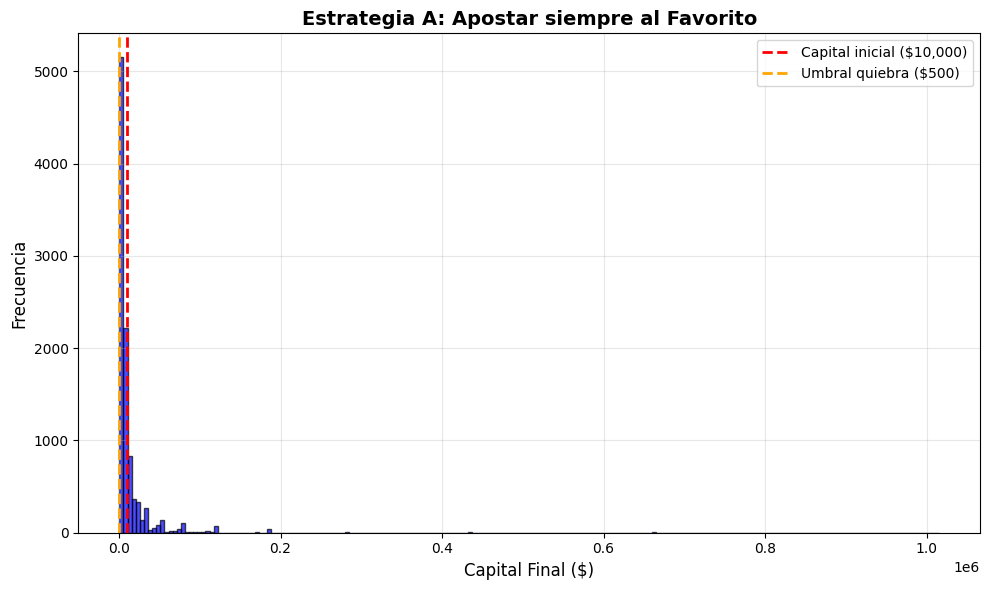



Se generaron 10000 capitales finales de apostadores que usaron la estrategia A de manera seguida en 50 carreraras
---------------------------------------------------------------------------------------------- 

El 26.939999999999998% de los apostadores gano mas de su capital inicial 

El 0.03% de los apostadores perdio todo su dinero retirandose en 500$ 

Los apostadores tuvieron una ganancia promedio de 13597.015143231869$ 

El apostador con mayor ganancia, obtuvo 1015498.0259134225$ 







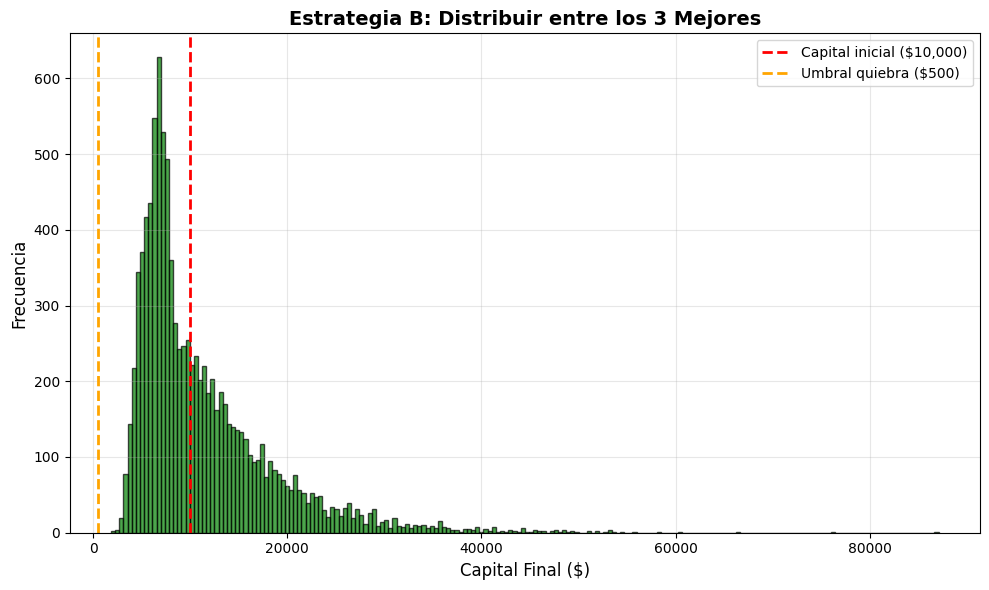



Se generaron 10000 capitales finales de apostadores que usaron la estrategia B de manera seguida en 50 carreraras
---------------------------------------------------------------------------------------------- 

El 43.59% de los apostadores gano mas de su capital inicial 

El 0.0% de los apostadores perdio todo su dinero retirandose en 500$ 

Los apostadores tuvieron una ganancia promedio de 11296.375087987752$ 

El apostador con mayor ganancia, obtuvo 87091.79275556297$ 







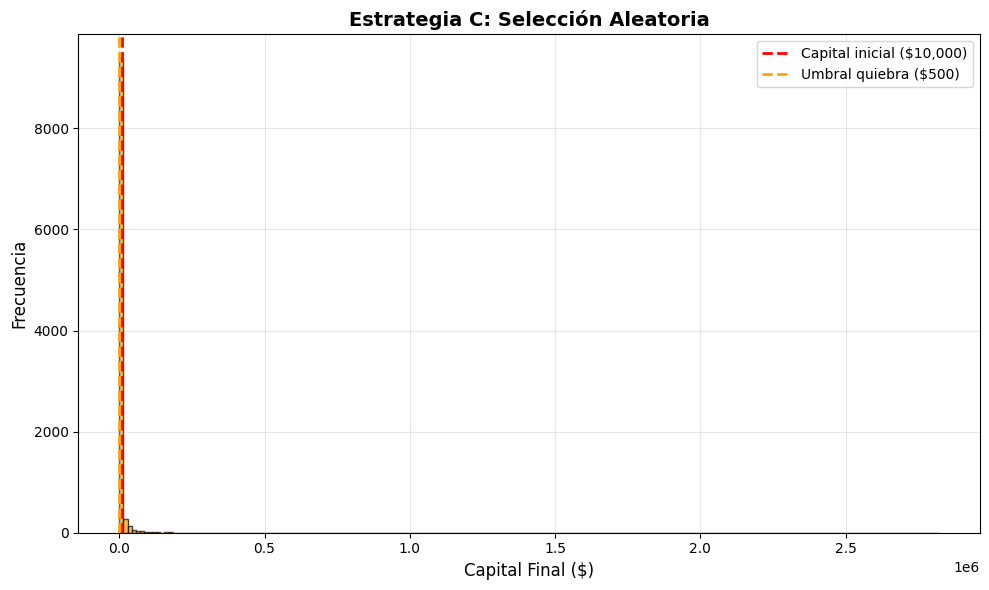



Se generaron 10000 capitales finales de apostadores que usaron la estrategia C de manera seguida en 50 carreraras
---------------------------------------------------------------------------------------------- 

El 8.7% de los apostadores gano mas de su capital inicial 

El 3.2399999999999998% de los apostadores perdio todo su dinero retirandose en 500$ 

Los apostadores tuvieron una ganancia promedio de 7128.191402956046$ 

El apostador con mayor ganancia, obtuvo 2821164.446740506$ 







In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(resul_A, bins=200, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(10000, color='red', linestyle='--', linewidth=2, label='Capital inicial ($10,000)')
plt.axvline(500, color='orange', linestyle='--', linewidth=2, label='Umbral quiebra ($500)')
plt.title('Estrategia A: Apostar siempre al Favorito', fontsize=14, fontweight='bold')
plt.xlabel('Capital Final ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n")
print("Se generaron 10000 capitales finales de apostadores que usaron la estrategia A de manera seguida en 50 carreraras")
print("---------------------------------------------------------------------------------------------- \n")
print(f"El {ganan_A}% de los apostadores gano mas de su capital inicial \n")
print(f"El {quiebra_A}% de los apostadores perdio todo su dinero retirandose en 500$ \n")
print(f"Los apostadores tuvieron una ganancia promedio de {promedio_A}$ \n")
print(f"El apostador con mayor ganancia, obtuvo {maximo_A}$ \n")
print("\n\n\n")

plt.figure(figsize=(10, 6))
plt.hist(resul_B, bins=200, color='green', alpha=0.7, edgecolor='black')
plt.axvline(10000, color='red', linestyle='--', linewidth=2, label='Capital inicial ($10,000)')
plt.axvline(500, color='orange', linestyle='--', linewidth=2, label='Umbral quiebra ($500)')
plt.title('Estrategia B: Distribuir entre los 3 Mejores', fontsize=14, fontweight='bold')
plt.xlabel('Capital Final ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n")
print("Se generaron 10000 capitales finales de apostadores que usaron la estrategia B de manera seguida en 50 carreraras")
print("---------------------------------------------------------------------------------------------- \n")
print(f"El {ganan_B}% de los apostadores gano mas de su capital inicial \n")
print(f"El {quiebra_B}% de los apostadores perdio todo su dinero retirandose en 500$ \n")
print(f"Los apostadores tuvieron una ganancia promedio de {promedio_B}$ \n")
print(f"El apostador con mayor ganancia, obtuvo {maximo_B}$ \n")
print("\n\n\n")

plt.figure(figsize=(10, 6))
plt.hist(resul_C, bins=200, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(10000, color='red', linestyle='--', linewidth=2, label='Capital inicial ($10,000)')
plt.axvline(500, color='orange', linestyle='--', linewidth=2, label='Umbral quiebra ($500)')
plt.title('Estrategia C: Selección Aleatoria', fontsize=14, fontweight='bold')
plt.xlabel('Capital Final ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n")
print("Se generaron 10000 capitales finales de apostadores que usaron la estrategia C de manera seguida en 50 carreraras")
print("---------------------------------------------------------------------------------------------- \n")
print(f"El {ganan_C}% de los apostadores gano mas de su capital inicial \n")
print(f"El {quiebra_C}% de los apostadores perdio todo su dinero retirandose en 500$ \n")
print(f"Los apostadores tuvieron una ganancia promedio de {promedio_C}$ \n")
print(f"El apostador con mayor ganancia, obtuvo {maximo_C}$ \n")
print("\n\n\n")

## Conlcusion
Con los resultados se pudo concluir que la estrategia mas segura es la B apostar equitativamente a los 3 mejores caballos, ya que en 10,000 casos tuvo el mayor porcentaje de apostadores que recuperaron mas de su capital inicial, mostro que en 50 carreras ningun apostador se fue a la quiebra, mientras en las otras graficas se veian muy inclinadas a la izquierda, esta grafica se muestra mas uniforme con tendencia hacia lado derecho demostrando mejor rendimiento en ganancias.

Aun asi el metodo muestra que la estrategia B aunque es la mas segura, la mayoria no logra recuperar su capital y los que obtienen ganancias son muy minimas.
<br><br>

La estrategia A hay mas riesgo ya que solo el 26.94% gano mas de su capital y si hubo apostadores que quebraron siendo solo el 0.03%. Pero a diferencia de la B se mostro un mayor rango de ganancias, pero en proporcion riego/ganancia sigue siendo peor.
<br><br>

La estrategia C es la peor la mayoria no recupero su capital inicial y el 3.99% de los apostadores quebraron teniendo una mucha mayor taza de quiebre que las otras estrategias, lo unico en el cual esta estrategia destaco es que el apostador con mas suerte termino teniendo una ganacia notablemente mayor que en los otros tres casos ya que en la estrategia C el apostador con mayor ganancia tuvo 2821164.45$

mientras que en el A el mayor apostador obtuvo $1015498.0259134225$$

y en el B la mayor ganancia fue mucho mas baja, tan solo de  $87091.79275556297$ $

<br>

**Por lo que:**
* La estrategia A mostro un riesgo alto - rescompensa medio alto
* La estrategia B mostro un riesgo medio bajo - recompensa medio
* La estrategia C mostro un riesgo muy alto - recompensa muy alto


##Conclusion general
Una buena estrategia y el control del dinero son claves para reducir el riesgo en escenarios en los que se tiene poca certeza y esto se puede lograr gracias a la simulacion de diversos escenarios usando la programación.